In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

pd.options.display.float_format = "{:.2f}".format

%matplotlib inline

In [2]:
king = pd.read_csv("King_County_House_prices_dataset.csv")
king.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014 221900.00         3       1.00         1180   
1  6414100192   12/9/2014 538000.00         3       2.25         2570   
2  5631500400   2/25/2015 180000.00         2       1.00          770   
3  2487200875   12/9/2014 604000.00         4       3.00         1960   
4  1954400510   2/18/2015 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650    1.00         nan  0.00  ...      7        1180            0.0   
1      7242    2.00        0.00  0.00  ...      7        2170          400.0   
2     10000    1.00        0.00  0.00  ...      6         770            0.0   
3      5000    1.00        0.00  0.00  ...      7        1050          910.0   
4      8080    1.00        0.00  0.00  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  
0     1955          0.00    98178 47.51 -122.26           1340        5650  
1     1951       1991.00    98125 47.72 -122.32           1690        7639  
2     1933           nan    98028 47.74 -122.23           2720        8062  
3     1965          0.00    98136 47.52 -122.39           1360        5000  
4     1987          0.00    98074 47.62 -122.05           1800        7503  

[5 rows x 21 columns]

In [3]:
king.describe()
#look at data, are there outliers or do we have to drop some?

id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count      21597.00   21597.00  21597.00   21597.00     21597.00   21597.00   
mean  4580474287.77  540296.57      3.37       2.12      2080.32   15099.41   
std   2876735715.75  367368.14      0.93       0.77       918.11   41412.64   
min      1000102.00   78000.00      1.00       0.50       370.00     520.00   
25%   2123049175.00  322000.00      3.00       1.75      1430.00    5040.00   
50%   3904930410.00  450000.00      3.00       2.25      1910.00    7618.00   
75%   7308900490.00  645000.00      4.00       2.50      2550.00   10685.00   
max   9900000190.00 7700000.00     33.00       8.00     13540.00 1651359.00   

        floors  waterfront     view  condition    grade  sqft_above  yr_built  \
count 21597.00    19221.00 21534.00   21597.00 21597.00    21597.00  21597.00   
mean      1.49        0.01     0.23       3.41     7.66     1788.60   1971.00   
std       0.54        0.09     0.77       0.65     1.17      827.76     29.38   
min       1.00        0.00     0.00       1.00     3.00      370.00   1900.00   
25%       1.00        0.00     0.00       3.00     7.00     1190.00   1951.00   
50%       1.50        0.00     0.00       3.00     7.00     1560.00   1975.00   
75%       2.00        0.00     0.00       4.00     8.00     2210.00   1997.00   
max       3.50        1.00     4.00       5.00    13.00     9410.00   2015.00   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
count      17755.00 21597.00 21597.00 21597.00       21597.00    21597.00  
mean          83.64 98077.95    47.56  -122.21        1986.62    12758.28  
std          399.95    53.51     0.14     0.14         685.23    27274.44  
min            0.00 98001.00    47.16  -122.52         399.00      651.00  
25%            0.00 98033.00    47.47  -122.33        1490.00     5100.00  
50%            0.00 98065.00    47.57  -122.23        1840.00     7620.00  
75%            0.00 98118.00    47.68  -122.12        2360.00    10083.00  
max         2015.00 98199.00    47.78  -121.31        6210.00   871200.00

In [4]:
# general overview: 
#sns.pairplot(king)

<AxesSubplot:>

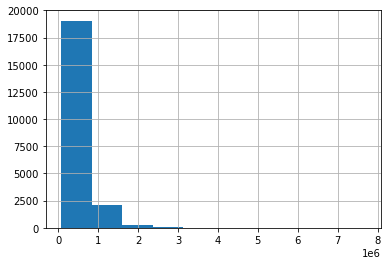

In [5]:
king.price.hist()

In [54]:
#checking highest prices:
king.query('price > 3000000').sort_values("price", ascending=False)

id        date      price  bedrooms  bathrooms  sqft_living  \
7245   6762700020  10/13/2014 7700000.00         6       8.00        12050   
3910   9808700762   6/11/2014 7060000.00         5       4.50        10040   
9245   9208900037   9/19/2014 6890000.00         6       7.75         9890   
4407   2470100110    8/4/2014 5570000.00         5       5.75         9200   
1446   8907500070   4/13/2015 5350000.00         5       5.00         8000   
1313   7558700030   4/13/2015 5300000.00         6       6.00         7390   
1162   1247600105  10/20/2014 5110000.00         5       5.25         8010   
8085   1924059029   6/17/2014 4670000.00         5       6.75         9640   
2624   7738500731   8/15/2014 4500000.00         5       5.50         6640   
8629   3835500195   6/18/2014 4490000.00         4       3.00         6430   
12358  6065300370    5/6/2015 4210000.00         5       6.00         7440   
4145   6447300265  10/14/2014 4000000.00         4       5.50         7080   
2083   8106100105  11/14/2014 3850000.00         4       4.25         5770   
19002  2303900100   9/11/2014 3800000.00         3       4.25         5510   
7028    853200010    7/1/2014 3800000.00         5       5.50         7050   
16288  7397300170   5/30/2014 3710000.00         4       3.50         5550   
6502   4217402115   4/21/2015 3650000.00         6       4.75         5480   
18467  4389201095   5/11/2015 3650000.00         5       3.75         5020   
19133  3625049042  10/11/2014 3640000.00         5       6.00         5490   
15241  2425049063   9/11/2014 3640000.00         4       3.25         4830   
2862   4114601570  11/18/2014 3600000.00         3       3.25         5020   
21560  9253900271    1/7/2015 3570000.00         5       4.50         4850   
5874   2525049148   10/7/2014 3420000.00         5       5.00         5450   
10435  1118000320    5/8/2015 3400000.00         4       4.00         4260   
7982   9362000040   6/23/2014 3400000.00         3       4.50         5230   
13954  3126059023    3/3/2015 3400000.00         4       3.50         4730   
20444  9808100150    4/2/2015 3350000.00         5       3.75         5350   
18462  1346300150  10/20/2014 3300000.00         8       4.00         7710   
18288  6072800246    7/2/2014 3300000.00         5       6.25         8020   
18185  3625059152  12/30/2014 3300000.00         3       3.25         4220   
14070  3625059043    9/4/2014 3300000.00         5       4.75         6200   
2442   7524900003  12/10/2014 3280000.00         2       1.75         6840   
20279   251500080   8/26/2014 3200000.00         4       4.00         4810   
7900   1068000375   9/23/2014 3200000.00         6       5.00         7100   
11523  8964800890    1/9/2015 3200000.00         3       3.25         4560   
7184   7159200005    5/7/2014 3200000.00         7       4.50         6210   
15468   624069108   8/12/2014 3200000.00         4       3.25         7000   
13515  3025059124   8/28/2014 3170000.00         5       3.50         4330   
10454   333100295  11/24/2014 3120000.00         3       3.50         4490   
7306   4131900066   8/25/2014 3100000.00         3       3.00         3920   
16955  3025059093   7/29/2014 3100000.00         5       5.25         5090   
12859  2424049029   5/29/2014 3100000.00         6       4.25         6980   
300    3225069065   6/24/2014 3080000.00         4       5.00         4550   
15244  1732800780   2/12/2015 3070000.00         5       3.00         4150   
656    3760500116  11/20/2014 3070000.00         3       2.50         3930   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7245      27600    2.50        0.00  3.00  ...     13        8570   
3910      37325    2.00        1.00  2.00  ...     11        7680   
9245      31374    2.00        0.00  4.00  ...     13        8860   
4407      35069    2.00        0.00  0.00  ...     13        6200   
1446      23985    2.00        0.00  4.00  ...     12        6720   
1313      24

In [7]:
#check 33 bedrooms and max sqft:
king['bedrooms'].sort_values().tail(20)

15656     8
15056     8
18462     8
4063      8
17221     8
9068      8
4031      8
1658      8
6168      8
4092      9
18428     9
8537      9
6073      9
16830     9
4231      9
15147    10
13301    10
19239    10
8748     11
15856    33
Name: bedrooms, dtype: int64

In [8]:
#king['sqft_living'].sort_values().tail(20)
#king['price'].sort_values().tail(20)

In [9]:
king_n = king.drop([15856])
# i just drop the 33 bedroom house, other data seems continous

In [10]:
#create price/sqft column and age column
king_n.eval('price_sqft = price / sqft_living', inplace = True)
king_n.eval('age = 2016 - yr_built', inplace = True)

In [11]:
#checking object "sqft_basement"
king_n["sqft_basement"].nunique()

304

In [12]:
#reformatting "sqft_basement"
king_n.sqft_basement = pd.to_numeric(king_n.sqft_basement, errors='coerce')
king_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   price          21596 non-null  float64
 3   bedrooms       21596 non-null  int64  
 4   bathrooms      21596 non-null  float64
 5   sqft_living    21596 non-null  int64  
 6   sqft_lot       21596 non-null  int64  
 7   floors         21596 non-null  float64
 8   waterfront     19220 non-null  float64
 9   view           21533 non-null  float64
 10  condition      21596 non-null  int64  
 11  grade          21596 non-null  int64  
 12  sqft_above     21596 non-null  int64  
 13  sqft_basement  21142 non-null  float64
 14  yr_built       21596 non-null  int64  
 15  yr_renovated   17754 non-null  float64
 16  zipcode        21596 non-null  int64  
 17  lat            21596 non-null  float64
 18  long  

In [13]:
#Make Dummies out of sqft basement, waterfront & renovated:
# standardize all values > 0 to 1 for renovation & sqft_basement:
b= king_n['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
r= king_n['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [14]:
# get dummies for water & add to king_n
water_dum = pd.get_dummies(king_n['waterfront'], prefix='water', drop_first=True)
king_n = pd.concat([king_n, water_dum], axis=1)

In [15]:
# get dummies for basement & add to king_n
b.rename('base_dum', inplace = True)
king_n = pd.concat([king_n, b], axis=1)
# not working:
# base_dum = pd.get_dummies(king_n['base_dum'], drop_first=True)
# king_n = pd.concat([king_n, base_dum], axis=1)
# king_n.drop('base_dum', inplace=True)

In [16]:
# get dummies for renovation & add to king_n
r.rename('reno_dum', inplace = True)
king_n = pd.concat([king_n, r], axis=1)

In [17]:
king_n.rename(columns = {'water_1.0': 'water_dum'}, inplace=True)

In [18]:
king_n.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014 221900.00         3       1.00         1180   
1  6414100192   12/9/2014 538000.00         3       2.25         2570   
2  5631500400   2/25/2015 180000.00         2       1.00          770   
3  2487200875   12/9/2014 604000.00         4       3.00         1960   
4  1954400510   2/18/2015 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  zipcode   lat    long  \
0      5650    1.00         nan  0.00  ...    98178 47.51 -122.26   
1      7242    2.00        0.00  0.00  ...    98125 47.72 -122.32   
2     10000    1.00        0.00  0.00  ...    98028 47.74 -122.23   
3      5000    1.00        0.00  0.00  ...    98136 47.52 -122.39   
4      8080    1.00        0.00  0.00  ...    98074 47.62 -122.05   

   sqft_living15  sqft_lot15  price_sqft  age  water_dum  base_dum  reno_dum  
0           1340        5650      188.05   61          0         0         0  
1           1690        7639      209.34   65          0         1         1  
2           2720        8062      233.77   83          0         0         0  
3           1360        5000      308.16   51          0         1         0  
4           1800        7503      303.57   29          0         0         0  

[5 rows x 26 columns]

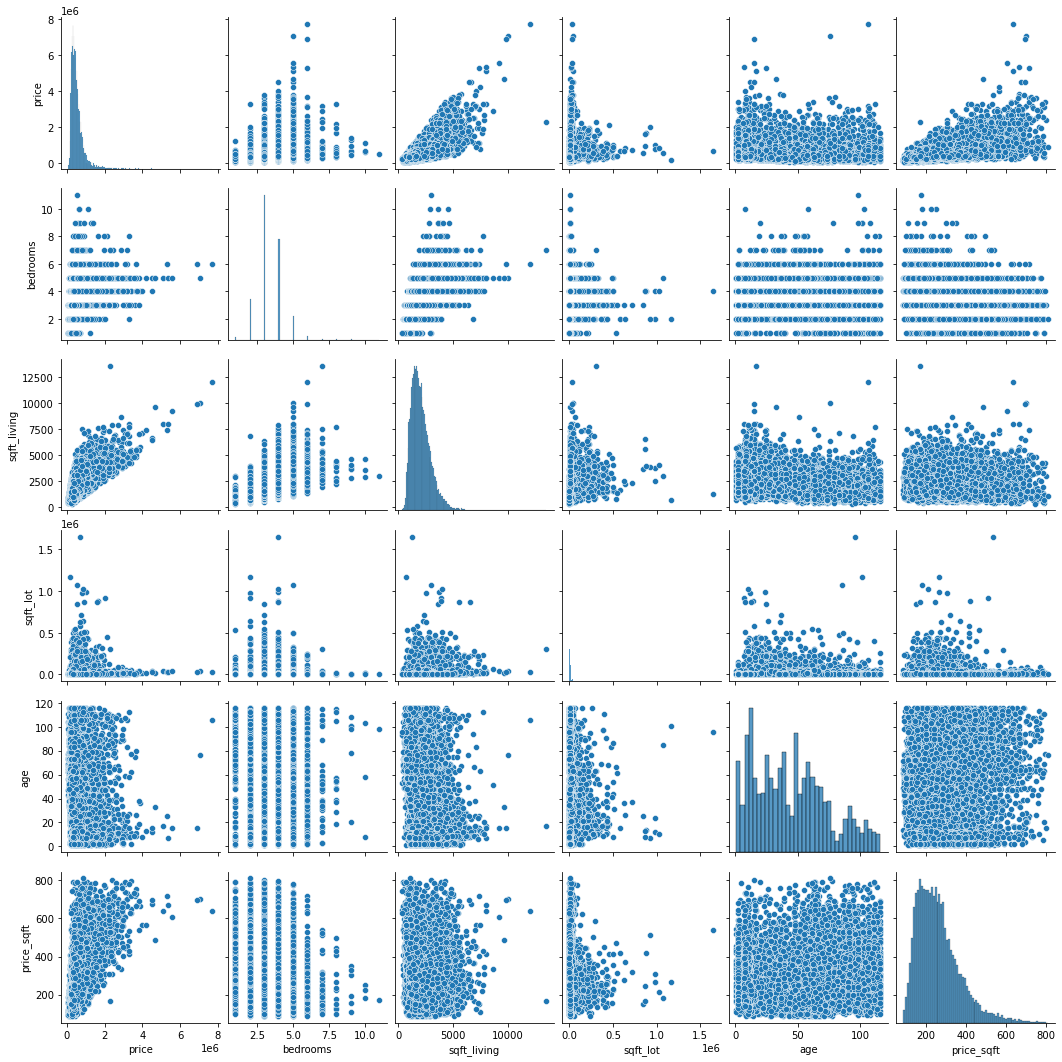

In [55]:
# pick some interesting variables and check for correlation:
X1 = king_n[['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'age', 'price_sqft']]
sns.pairplot(X1);

# First Assumption:
---

Location near to city center is most expensive. Where are other nice neighbourhoods? Are there houses under their respective market value?

<AxesSubplot:>

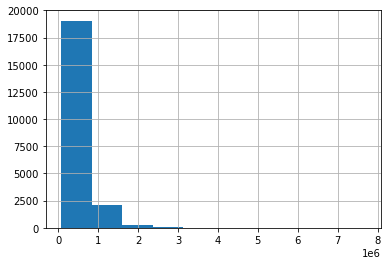

In [20]:
king.price.hist()

# this basically resembles the location of the properties on the seattle map, white areas are watersides
king.plot(kind = 'scatter', x = "long", y = "lat", figsize = (12,12))

BBox = (-121.31, -122.52, 41.16, 41.78)
seattle_map = plt.imread('seattle_map.png')

fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(king_n.lat, king_n.long, zorder=1, alpha= 0.8)
ax.set_title('Plotting Spatial Data on Seattle Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(seattle_map, zorder=0, extent = BBox, aspect= 'equal')

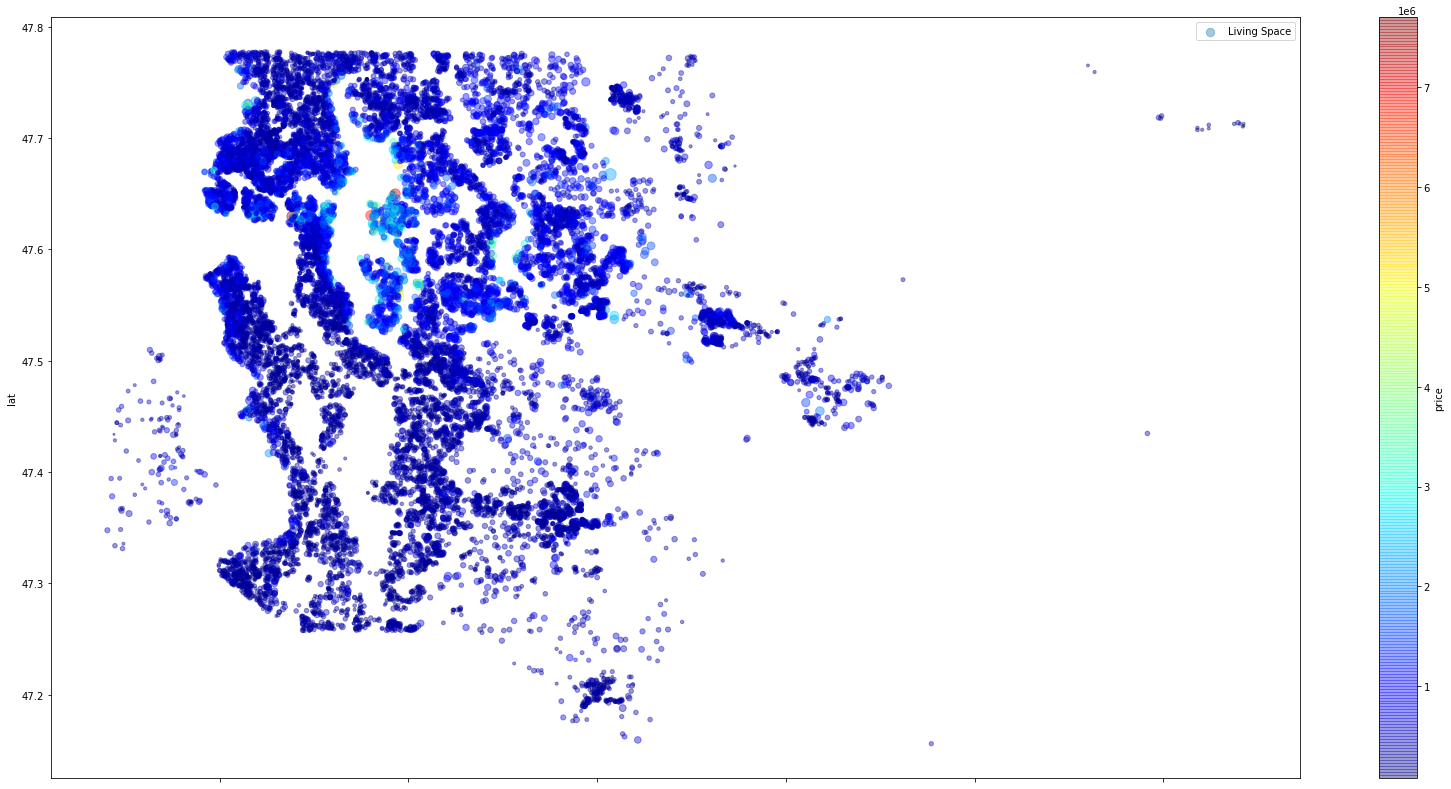

In [21]:
king_n.plot(kind="scatter", x="long", y="lat",
    s=king_n['sqft_living']/100, label="Living Space",
    c="price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(28,14))
plt.legend()
plt.show()

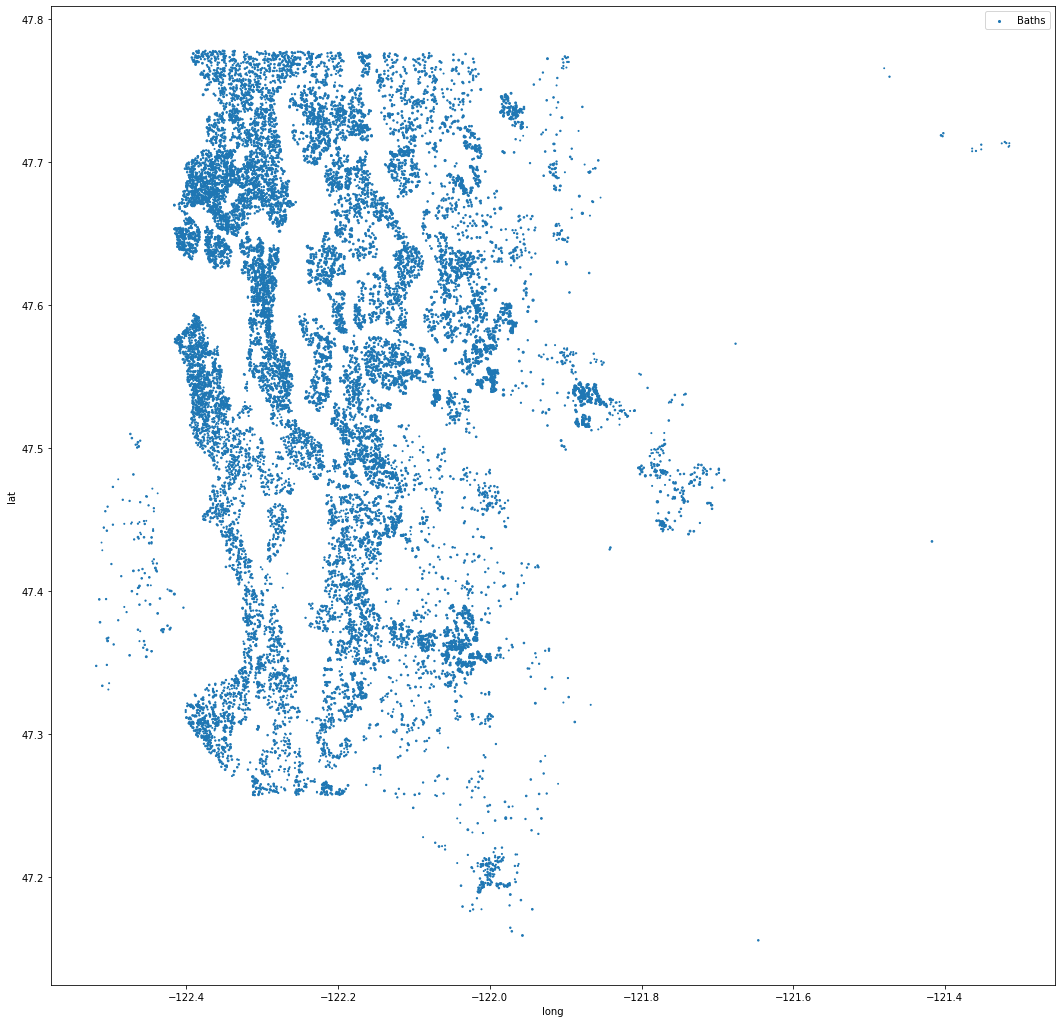

In [22]:
seattle_map=mpimg.imread('seattle_map.png')
ax = king_n.plot(kind="scatter", x="long", y="lat", figsize=(18,18), 
    s=king_n['bathrooms'], label="Baths",
    #c="price", cmap=plt.get_cmap("jet"),
    #colorbar=True, alpha=0.4
    )

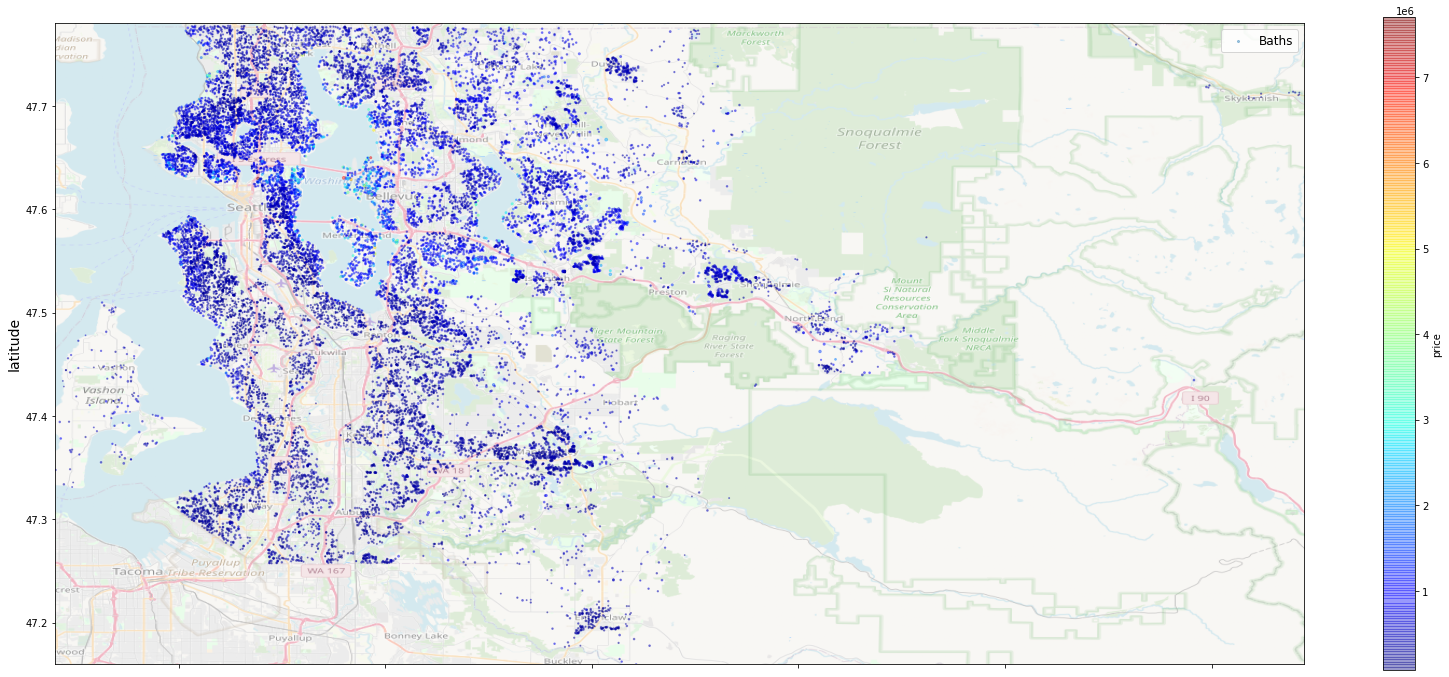

In [23]:
seattle_map=mpimg.imread('seattle_map.png')
ax = king_n.plot(kind="scatter", x="long", y="lat", figsize=(28,12), 
    s=king_n['bathrooms'], label="Baths",
    c="price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4
    )

plt.imshow(seattle_map, extent=[-122.52, -121.31, 47.16, 47.78], alpha=0.5)
plt.ylabel("latitude", fontsize=14)
plt.xlabel("longitude", fontsize=14)

prices = king_n['price']
tick_values = np.linspace(prices.min(), prices.max(), 6)
#cbar = plt.colorbar()
#cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=10)
#cbar.set_label('Price', fontsize=12)

plt.legend(fontsize=12)
plt.show()

fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(king_n.lat, king_n.long, zorder=1, alpha= 0.8)
ax.set_title('Plotting Spatial Data on Seattle Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(seattle_map, zorder=0, extent = BBox, aspect= 'equal')

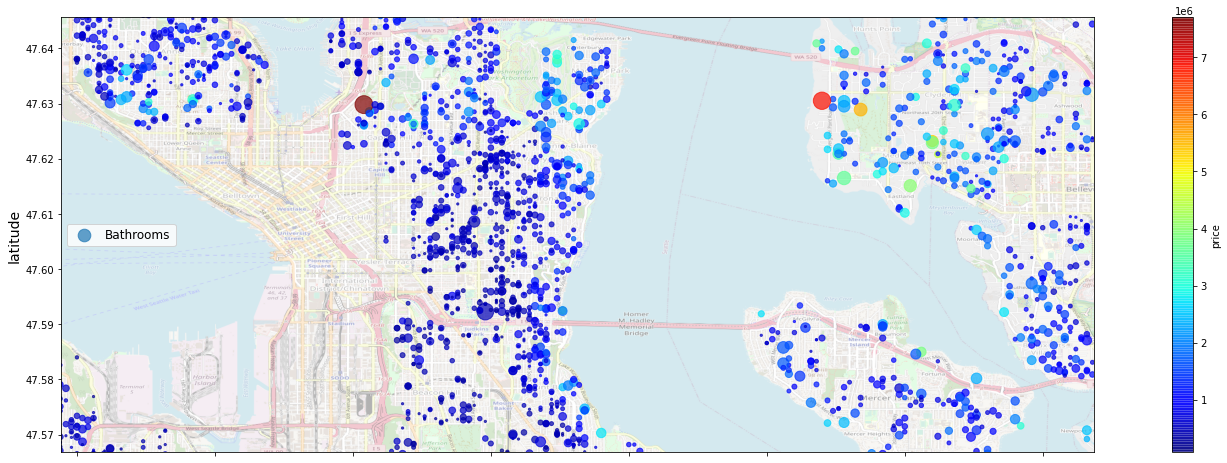

In [24]:
seattle_map=mpimg.imread('seattle_map2.png')
ax = king_n.plot(kind="scatter", x="long", y="lat", figsize=(28,8), 
    s=[5*n**2 for n in king_n['bathrooms']], label="Bathrooms",
    c="price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.7
    )

plt.imshow(seattle_map, extent=[-122.3779, -122.1908, 47.5668, 47.6456], alpha=0.5)
plt.ylabel("latitude", fontsize=14)
plt.xlabel("longitude", fontsize=14)

prices = king_n['price']
tick_values = np.linspace(prices.min(), prices.max(), 6)
#cbar = plt.colorbar()
#cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=10)
#cbar.set_label('Price', fontsize=12)

plt.legend(fontsize=12)
plt.show()

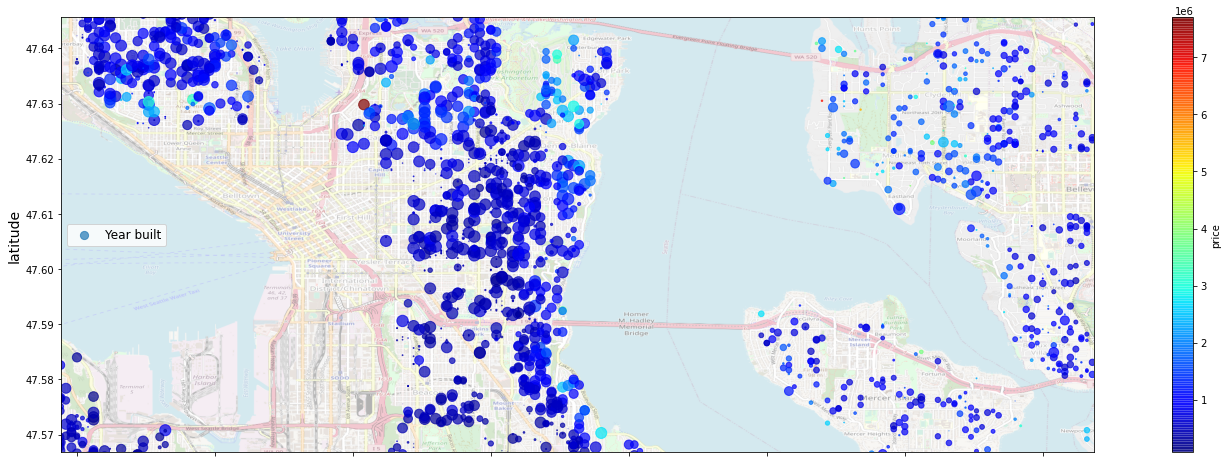

In [25]:
seattle_map=mpimg.imread('seattle_map2.png')
ax = king_n.plot(kind="scatter", x="long", y="lat", figsize=(28,8), 
    s=[(2016-n)**2/100 for n in king_n['yr_built']], label="Year built",
    c="price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.7
    )

plt.imshow(seattle_map, extent=[-122.3779, -122.1908, 47.5668, 47.6456], alpha=0.5)
plt.ylabel("latitude", fontsize=14)
plt.xlabel("longitude", fontsize=14)

prices = king_n['price']
tick_values = np.linspace(prices.min(), prices.max(), 6)
#cbar = plt.colorbar()
#cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=10)
#cbar.set_label('Price', fontsize=12)

plt.legend(fontsize=12)
plt.show()

Checking for Houses built before 1970, with more than 4 Bathrooms, lot > 8.000 sqft & over 1 Million Dollar

In [26]:
king_q = king.query('price > 1000000 and bathrooms >4 and yr_built <1970 and sqft_lot > 8000')
king_q.sort_values(['sqft_living'])

id        date      price  bedrooms  bathrooms  sqft_living  \
4312   7639900025   6/28/2014 1080000.00         4       4.25         3500   
17665  3585901085    6/4/2014 2010000.00         6       4.50         3810   
15539  1732801150    7/1/2014 2300000.00         4       4.75         3970   
4031    685000115   10/7/2014 2150000.00         8       6.00         4340   
18314  5317100750   7/11/2014 2920000.00         4       4.75         4575   
1359   1925069082   5/11/2015 2200000.00         5       4.25         4640   
15578  5093300280    7/9/2014 1680000.00         5       5.25         4830   
9405   5700003630   6/30/2014 1930000.00         5       4.25         4830   
779    1954700695   6/12/2014 2250000.00         5       4.25         4860   
2038   9471200200   3/25/2015 2530000.00         4       4.25         5040   
3381   1118001408  11/24/2014 2540000.00         5       4.75         5410   
6502   4217402115   4/21/2015 3650000.00         6       4.75         5480   
15035  8924600020  11/14/2014 1540000.00         4       4.50         5770   
7184   7159200005    5/7/2014 3200000.00         7       4.50         6210   
5697   1118002000   6/24/2014 2470000.00         5       4.75         6390   
5961   5249800010   12/3/2014 2730000.00         4       4.25         6410   
3018   3377900195   9/29/2014 2530000.00         4       5.50         6930   
7900   1068000375   9/23/2014 3200000.00         6       5.00         7100   
14542  2303900035   6/11/2014 2890000.00         5       6.25         8670   
3910   9808700762   6/11/2014 7060000.00         5       4.50        10040   
7245   6762700020  10/13/2014 7700000.00         6       8.00        12050   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
4312       8750    1.00        0.00  4.00  ...      9        2140   
17665     28176    1.00        0.00  4.00  ...     10        3810   
15539      9778    2.00        0.00  2.00  ...     11        3390   
4031       9415    2.00        0.00  0.00  ...      8        4340   
18314     24085    2.50        0.00  2.00  ...     10        3905   
1359      22703    2.00        1.00  4.00  ...      8        2860   
15578     18707    2.00        0.00  1.00  ...      9        3930   
9405       8050    2.50         nan   nan  ...     11        3710   
779        9453    1.50        0.00  1.00  ...     10        3100   
2038      16048    1.00        0.00  3.00  ...     10        3420   
3381      13431    2.00        0.00  0.00  ...     10        5050   
6502      19401    1.50        1.00  4.00  ...     11        3910   
15035     10050    1.00        0.00  3.00  ...      9        3160   
7184       8856    2.50        0.00  2.00  ...     11        4760   
5697      13180    2.00        0.00  0.00  ...     10        4560   
5961      43838    2.50        0.00  2.00  ...     12        5610   
3018      45100    1.00        0.00  0.00  ...     11        4310   
7900      18200    2.50        0.00  0.00  ...     13        5240   
14542     64033    2.00        0.00  4.00  ...     13        6120   
3910      37325    2.00        1.00  2.00  ...     11        7680   
7245      27600    2.50        0.00  3.00  ...     13        8570   

       sqft_basement yr_built  yr_renovated  zipcode   lat    long  \
4312          1360.0     1951          0.00    98177 47.72 -122.37   
17665            0.0     1969          0.00    98177 47.76 -122.38   
15539          580.0     1928          0.00    98119 47.63 -122.37   
4031             0.0     1967          0.00    98004 47.63 -122.20   
18314          670.0     1926          0.00    98112 47.63 -122.28   
1359          1780.0     1952          0.00    98052 47.64 -122.10   
15578          900.0     1952       1998.00    98040 47.59 -122.25   
9405          1120.0     1914          0.00    98144 47.58 -122.29   
779           1760.0     1905          0.00    98112 47.62 -122.29   
2038          1620.0     1950           nan    98105 47.67 -122.26   
3381     

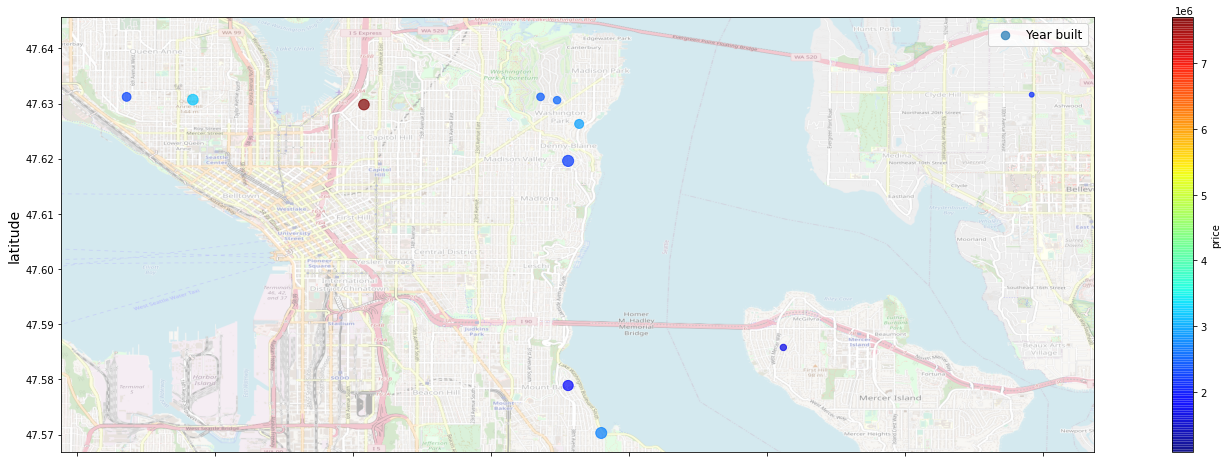

In [27]:

seattle_map=mpimg.imread('seattle_map2.png')
ax = king_q.plot(kind="scatter", x="long", y="lat", figsize=(28,8), 
    s=[(2016-n)**2/100 for n in king_q['yr_built']], label="Year built",
    c="price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.7
    )

plt.imshow(seattle_map, extent=[-122.3779, -122.1908, 47.5668, 47.6456], alpha=0.5)
plt.ylabel("latitude", fontsize=14)
plt.xlabel("longitude", fontsize=14)

prices = king_q['price']
tick_values = np.linspace(prices.min(), prices.max(), 6)
#cbar = plt.colorbar()
#cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=10)
#cbar.set_label('Price', fontsize=12)

plt.legend(fontsize=12)
plt.show()

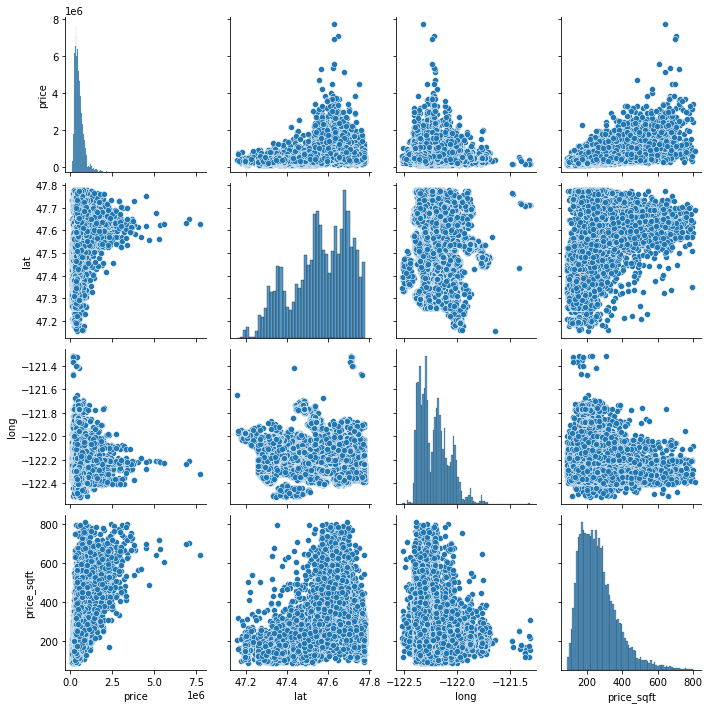

In [28]:
X2 = king_n[['price', 'lat', 'long', 'price_sqft']]
sns.pairplot(X2);

In [29]:
# There is an accumulation of overall observations and highest prices around long: -122.3, lat: 47.63 
# which is right around the city center (space needle) in seattle
# most expensive homes are around volunter park (city) & in medina (across lake whashington)
# if you take the price relative to sqft_living you see the properties spread out around the city center more evenly,
# which means the city centered houses have the highest prices, but are also relatively big 
# -> if you want to save a buck, got to the suburbs

# Second Assumption:
---

Livingspace has the biggest effect on housing prices

In [30]:
king_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   price          21596 non-null  float64
 3   bedrooms       21596 non-null  int64  
 4   bathrooms      21596 non-null  float64
 5   sqft_living    21596 non-null  int64  
 6   sqft_lot       21596 non-null  int64  
 7   floors         21596 non-null  float64
 8   waterfront     19220 non-null  float64
 9   view           21533 non-null  float64
 10  condition      21596 non-null  int64  
 11  grade          21596 non-null  int64  
 12  sqft_above     21596 non-null  int64  
 13  sqft_basement  21142 non-null  float64
 14  yr_built       21596 non-null  int64  
 15  yr_renovated   17754 non-null  float64
 16  zipcode        21596 non-null  int64  
 17  lat            21596 non-null  float64
 18  long  

In [31]:
X0 = king_n[['sqft_living']]
X0 = sms.add_constant(X0)
y0 = king_n.price

In [32]:
model0 = sms.OLS(y0, X0)
result0 = model0.fit()
result0.summary()
# see the R^2 is already 0.493 with just a single explanatory v.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        08:08:16   Log-Likelihood:            -3.0005e+05
No. Observations:               21596   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.401e+04   4410.123     -9.980      0.000   -5.27e+04   -3.54e+04
sqft_living   280.8688      1.939    144.820      0.000     277.067     284.670
==============================================================================
Omnibus:                    14801.492   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542642.481
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Split Data, train model & calculate RMSE:
---

In [49]:
# adding all necessary Variables to satisfy our customers wishes and some more under Gauss - Markov Assumptions
X = king_n[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'grade', 'age', 'base_dum', 'reno_dum', 'water_dum']]
X = sms.add_constant(X)
y = king_n.price

In [50]:
model = sms.OLS(y, X)
results = model.fit()
results.summary()
# this shows waterfront properties are significantly more expensive, on average ~ 81.3k $

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3935.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        08:21:01   Log-Likelihood:            -2.9617e+05
No. Observations:               21596   AIC:                         5.924e+05
Df Residuals:                   21585   BIC:                         5.925e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.895e+05   1.58e+04    -62.561      0.000   -1.02e+06   -9.58e+05
bedrooms    -4.557e+04   2134.585    -21.351      0.000   -4.98e+04   -4.14e+04
bathrooms    4.986e+04   3560.794     14.003      0.000    4.29e+04    5.68e+04
sqft_living   178.3740      3.344     53.338      0.000     171.819     184.929
sqft_lot       -0.2362      0.037     -6.393      0.000      -0.309      -0.164
floors       2.141e+04   3629.703      5.898      0.000    1.43e+04    2.85e+04
grade        1.295e+05   2160.624     59.921      0.000    1.25e+05    1.34e+05
age          3915.5296     67.319     58.164      0.000    3783.579    4047.480
base_dum     1.327e+04   3462.192      3.833      0.000    6484.008    2.01e+04
reno_dum     1.824e+04   8508.574      2.143      0.032    1557.593    3.49e+04
water_dum    7.507e+05   1.84e+04     40.820      0.000    7.15e+05    7.87e+05
==============================================================================
Omnibus:                    15746.036   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           989646.346
Skew:                           2.910   Prob(JB):                         0.00
Kurtosis:                      35.649   Cond. No.                     5.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
#after we are satisfied with our model, we export Data to CSV File:
king_n.to_csv('king_county_workfile.csv')

In [36]:
# We assign the features our model will be tested & trained on:
X = king_n[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'age', 
        'base_dum', 'reno_dum', 'water_dum']]
Y = king_n['price']

In [37]:
# split data into 90%training and 10% testing data:
X_train, X_test, y_train, y_test  = train_test_split(X, Y, test_size=0.1, random_state=42)

In [38]:
# check training Data again for outliers, missing values 
# The features in our modell are already dealt with by converting them to dummies and setting their default value to zero
# the positive effect of waterfront properties, a basement or a renovation will be flattened

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19436 entries, 13820 to 15795
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     19436 non-null  int64  
 1   bathrooms    19436 non-null  float64
 2   sqft_living  19436 non-null  int64  
 3   sqft_lot     19436 non-null  int64  
 4   floors       19436 non-null  float64
 5   grade        19436 non-null  int64  
 6   age          19436 non-null  int64  
 7   base_dum     19436 non-null  int64  
 8   reno_dum     19436 non-null  int64  
 9   water_dum    19436 non-null  uint8  
dtypes: float64(2), int64(7), uint8(1)
memory usage: 1.5 MB


In [40]:
# Adding the constants
X_train = sms.add_constant(X_train)
X_test = sms.add_constant(X_test) 

In [41]:
# Training the model
print("-----  Training the model ----")
model = sms.OLS(y_train, X_train).fit()
print_model = model.summary()


# Predictions to check the model
print("-----  Evaluating the model ----")
predictions = model.predict(X_train)
err_train = np.sqrt(mean_squared_error(y_train, predictions))
predictions_test = model.predict(X_test)
err_test = np.sqrt(mean_squared_error(y_test, predictions_test))

print(print_model)
print ("-------------")
print (f"RMSE on train data: {err_train}")
print (f"RMSE on test data: {err_test}")

-----  Training the model ----
-----  Evaluating the model ----
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     3563.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        08:08:16   Log-Likelihood:            -2.6668e+05
No. Observations:               19436   AIC:                         5.334e+05
Df Residuals:                   19425   BIC:                         5.335e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [43]:
# What would a house cost, that satisfies our customer totally?
# 6 Bedrooms, 5 Bathrooms, 4000sqft living space, 8000 sqft lot (tennis court is 2900sqft), 
# 2 floors, Grade at least 8, age 70+ Years, Basement, No Reno, No Waterside, But Golf
model.predict([1, 6, 5, 4000, 8000, 2, 8, 80, 1, 0, 0])

array([1105752.11024813])

In [45]:
# Going Crazy with a bigger house and all features:
model.predict([1, 10, 9, 8000, 16000, 2, 13, 80, 1, 1, 1])

array([3267131.6159233])